In [ ]:
import mdtraj as md
import numpy as np

topology_path = '../data/md_sampling/molDWRow_298/molDWRow_298_tautomer_1.pdb'
traj_path = '../data/md_mc_sampling/molDWRow_298/molDWRow_298_from_t1_to_t2_NCMC_work_run_nr_0.dcd'
traj = md.load(traj_path, top=topology_path)
elements = [atom.element.symbol for atom in traj.top.atoms]
print(elements)


from openmmtools.constants import kB
from simtk import unit

distance_unit = unit.nanometer
ani_distance_unit = unit.angstrom
hartree_to_kJ_mol = np.float(2625.499638)
ani_energy_unit = hartree_to_kJ_mol * unit.kilojoule_per_mole
nm_to_angstroms = (1.0 * distance_unit) / (1.0 * ani_distance_unit) 


import torchani
import torch
from tqdm import tqdm_notebook as tqdm

platform = 'cpu'
device = torch.device(platform)
model = torchani.models.ANI1ccx()
species = model.species_to_tensor(elements).to(device).unsqueeze(0)

def energy(x_in_angstroms):
    coordinates = torch.tensor([x_in_angstroms],
                          requires_grad=True, device=device, dtype=torch.float32)
    _, energy_in_hartree = model((species, coordinates))
    #print('Energy in hartree: {}'.format(energy_in_hartree))
    #print('Energy in hartree: {}'.format(energy_in_hartree.item()))
    #print('Energy converted by mult1: {}'.format(energy_in_hartree * hartree_to_kJ_mol))
    #print('Energy converted by mult2: {}'.format(energy_in_hartree.item() * hartree_to_kJ_mol))


    
    return energy_in_hartree

energies = []
for x_in_nm in tqdm(traj.xyz[::100]):
    x_in_angstroms = x_in_nm * nm_to_angstroms
    energies.append(energy(x_in_angstroms))

e = energies[0]
#print(e)
#print(e.item()* hartree_to_kJ_mol, float(e.detach()* hartree_to_kJ_mol), float(e.detach().item()* hartree_to_kJ_mol))
print(e.item(), float(e.detach()), float(e.detach().item()))
#print(e.item()* hartree_to_kJ_mol)
#print(float(e.detach()* hartree_to_kJ_mol))
#print(float(e.detach())* hartree_to_kJ_mol)


#print('Energy in hartree: {}'.format(e))
#print('Energy in hartree: {}'.format(e.item()))
#print('Energy converted by mult1: {}'.format(e * hartree_to_kJ_mol))
#print('Energy converted by mult2: {}'.format(e.item() * hartree_to_kJ_mol))



In [ ]:
import numpy as np
import torch

tensor = torch.tensor([np.pi], dtype=torch.float32)
scalar = np.e

l = 30
print('tensor:'.ljust(l), tensor)
print('type(tensor):'.ljust(l), repr(type(tensor)))
print()
print('tensor.item():'.ljust(l), tensor.item())
print('type(tensor.item()):'.ljust(l), type(tensor.item()))
print()
print('scalar:'.ljust(l), scalar)
print('type(scalar):'.ljust(l), type(scalar))
print()
print('(tensor * scalar).item():'.ljust(l), (tensor * scalar).item())
print()
print('tensor.item() * scalar:'.ljust(l), tensor.item() * scalar)
print('scalar * tensor.item():'.ljust(l), scalar * tensor.item())

In [ ]:
hartree_to_kJ_mol = np.float64(hartree_to_kJ_mol)
e_ = e.detach()
print((e_ * hartree_to_kJ_mol).item(), e_.item() * hartree_to_kJ_mol)

In [ ]:
from simtk import unit
distance_unit = unit.nanometer
# ANI-1 units and conversion factors
ani_distance_unit = unit.angstrom
hartree_to_kJ_mol = 2625.499638
ani_energy_unit = hartree_to_kJ_mol * unit.kilojoule_per_mole # simtk.unit doesn't have hartree?
nm_to_angstroms = (1.0 * distance_unit) / (1.0 * ani_distance_unit)


def calculate_energy(x, lambda_value, device, model, species):
    """
    Given a coordinate set (x) the energy is calculated in kJ/mol.

    Parameters
    ----------
    x : array of floats, unit'd (distance unit)
        initial configuration

    Returns
    -------
    E : float, unit'd 
    """

    assert(type(x) == unit.Quantity)

    coordinates = torch.tensor([x.value_in_unit(unit.nanometer)],
                            requires_grad=True, device=device, dtype=torch.float32)

    _, energy_in_hartree = model((species, coordinates * nm_to_angstroms, lambda_value))

    # convert energy from hartrees to kJ/mol
    #energy_in_kJ_mol = energy_in_hartree * hartree_to_kJ_mol
    return energy_in_hartree.item()


In [ ]:
x = np.arange(11)
plt.plot(harmonic_pot(x))
plt.show()

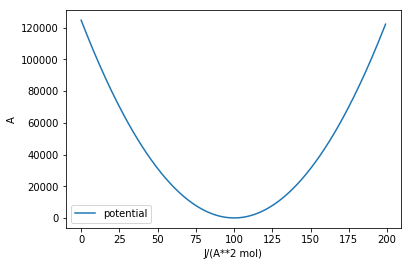

In [90]:
from openmmtools.constants import kB
import numpy as np
import matplotlib.pyplot as plt
import math
from simtk import unit
from scipy.stats import norm
import torch
from torch.distributions.normal import Normal

def harmonic_pot(x):
    e = (k/2) *(x - mean_distance)**2
    return e


sigma = 0.1 * unit.angstrom
T = 300 * unit.kelvin
k = (kB * T) / (sigma**2) 
mean_distance = 5

plt.plot(harmonic_pot(x), label='potential')
plt.xlabel('J/(A**2 mol)')
plt.ylabel('A')

plt.legend()
plt.show()

In [ ]:
len(x)

In [ ]:
plt.hist(harmonic_pot(x), bins=(int(len(x)/5)))
plt.hist(a, bins=(int(len(x)/5)))
plt.plot()

In [ ]:
print(n.log_prob(1.0))
print(n.log_prob(2.0))
print(n.log_prob(6.0))
